In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
#Load the dataset

hr_data = pd.read_csv(r"C:\Users\neeth\Downloads\HRDataset_v14.csv")
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [4]:
hr_data.shape

(311, 35)

In [5]:
# Duplicate Row Check
# Let's now check if all the rows are unique or not. This can be done by verifying the Unique Key - EmpID

if len(hr_data['EmpID'].unique()) == len(hr_data.index):
    print("No Duplicates. Each EmpID is unique.")
else:
    print("Duplicate observations present.")


No Duplicates. Each EmpID is unique.


In [6]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(hr_data.isnull().sum())

Total NULL Values in each columns
*********************************
Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
DateofHire                    0
DateofHire.1                  0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
Enga

In [7]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [8]:
# Select continuous variables
continuous_vars = ['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','Absences']

# Descriptive statistics for continuous variables
continuous_stats = hr_data[continuous_vars].describe()

print("Descriptive Analysis for Continuous Variables:")
print(continuous_stats)


Descriptive Analysis for Continuous Variables:
              Salary  EngagementSurvey  EmpSatisfaction  SpecialProjectsCount  \
count     311.000000        311.000000       311.000000            311.000000   
mean    69020.684887          4.110000         3.890675              1.218650   
std     25156.636930          0.789938         0.909241              2.349421   
min     45046.000000          1.120000         1.000000              0.000000   
25%     55501.500000          3.690000         3.000000              0.000000   
50%     62810.000000          4.280000         4.000000              0.000000   
75%     72036.000000          4.700000         5.000000              0.000000   
max    250000.000000          5.000000         5.000000              8.000000   

         Absences  
count  311.000000  
mean    10.237942  
std      5.852596  
min      1.000000  
25%      5.000000  
50%     10.000000  
75%     15.000000  
max     20.000000  


In [9]:
# Select categorical variables
categorical_vars = ['Position', 'Sex','MaritalDesc','TermReason','EmploymentStatus','Department','ManagerName','RecruitmentSource','PerformanceScore']

# Describe for categorical variables
categorical_stats = hr_data[categorical_vars].describe()

print("Descriptive Statistics for Categorical Variable:")
print(categorical_stats)

Descriptive Statistics for Categorical Variable:
                       Position  Sex MaritalDesc         TermReason  \
count                       311  311         311                311   
unique                       32    2           5                 18   
top     Production Technician I    F      Single  N/A-StillEmployed   
freq                        137  176         137                207   

       EmploymentStatus         Department     ManagerName RecruitmentSource  \
count               311                311             311               311   
unique                3                  6              21                 9   
top              Active  Production         Michael Albert            Indeed   
freq                207                209              22                87   

       PerformanceScore  
count               311  
unique                4  
top         Fully Meets  
freq                243  


In [10]:
# # Heat map

# # correlation_matrix = hr_data.corr()

# # # Create a heatmap using Seaborn
# # plt.figure(figsize=(15, 12))
# # sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
# # plt.title('Correlation between continous variables')
# # plt.show()

# continuous_vars = ['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','Absences','DeptID','PerfScoreID', 'DaysLateLast30']
# selected_data = hr_data[continuous_vars]

# correlation_matrix = selected_data.corr()
# # # Creating a heatmap using Seaborn
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
# plt.title('Correlation between continous variables')
# plt.show()


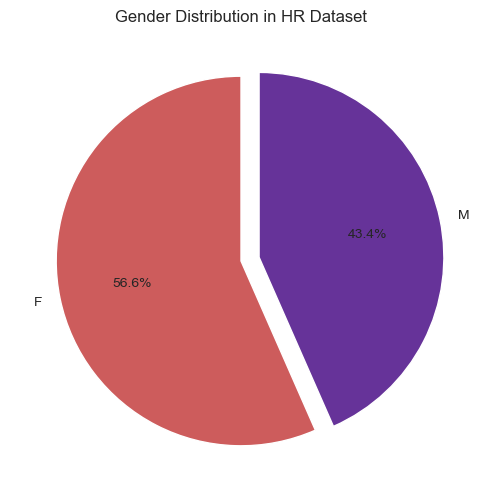

In [11]:
# Gender distribution

# Count the occurrences of each gender
gender_counts = hr_data['Sex'].value_counts()

# Plotting the Pie Chart
plt.figure(figsize=(8, 6))
explode = (0, 0.1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', explode=explode, startangle=90, colors=['indianred','rebeccapurple'])
plt.title('Gender Distribution in HR Dataset')
plt.show()

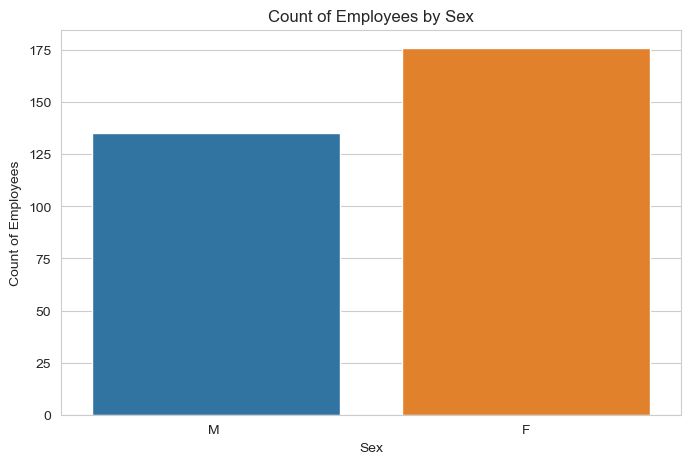

In [12]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=hr_data)

plt.title('Count of Employees by Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Employees')
plt.show()


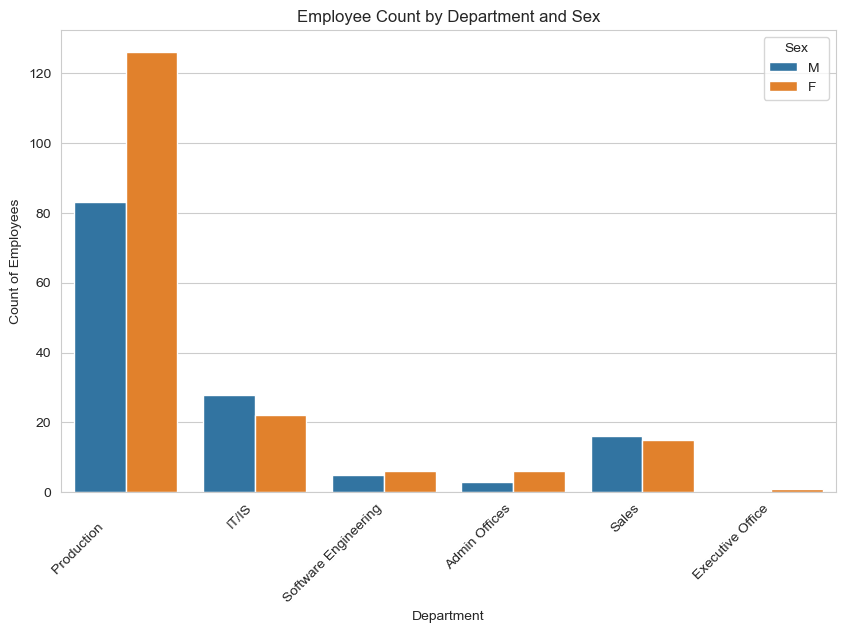

In [13]:
# Gender distribution in different departments
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Sex', data=hr_data)
# Customize x-axis labels
plt.xticks(rotation=45, ha='right') 
plt.title('Employee Count by Department and Sex')
plt.xlabel('Department')
plt.ylabel('Count of Employees')
plt.show()

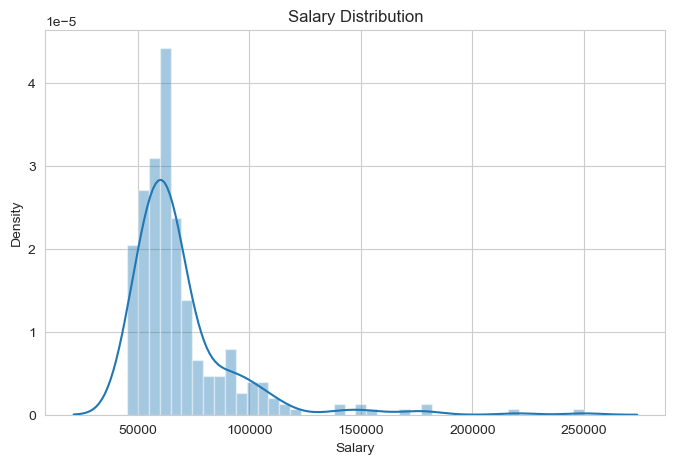

In [14]:
# Salary distribution

fig = plt.figure(figsize=(8,5))
g = sns.distplot(hr_data['Salary'])
g.set_title('Salary Distribution');

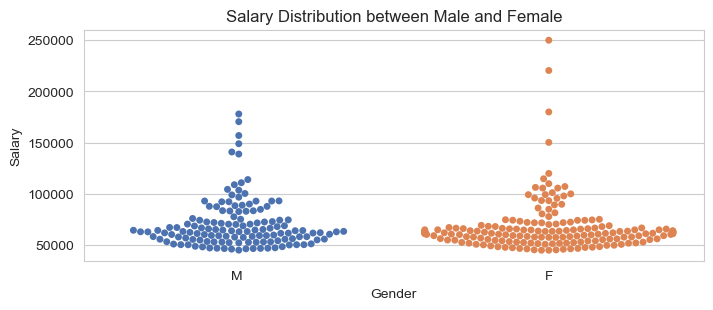

In [15]:
# Plotting swarmplot for Salary Distribution between Male and Female
plt.figure(figsize=(8,3))
sns.swarmplot(x='Sex', y='Salary', data=hr_data, palette = 'deep')

plt.title('Salary Distribution between Male and Female')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

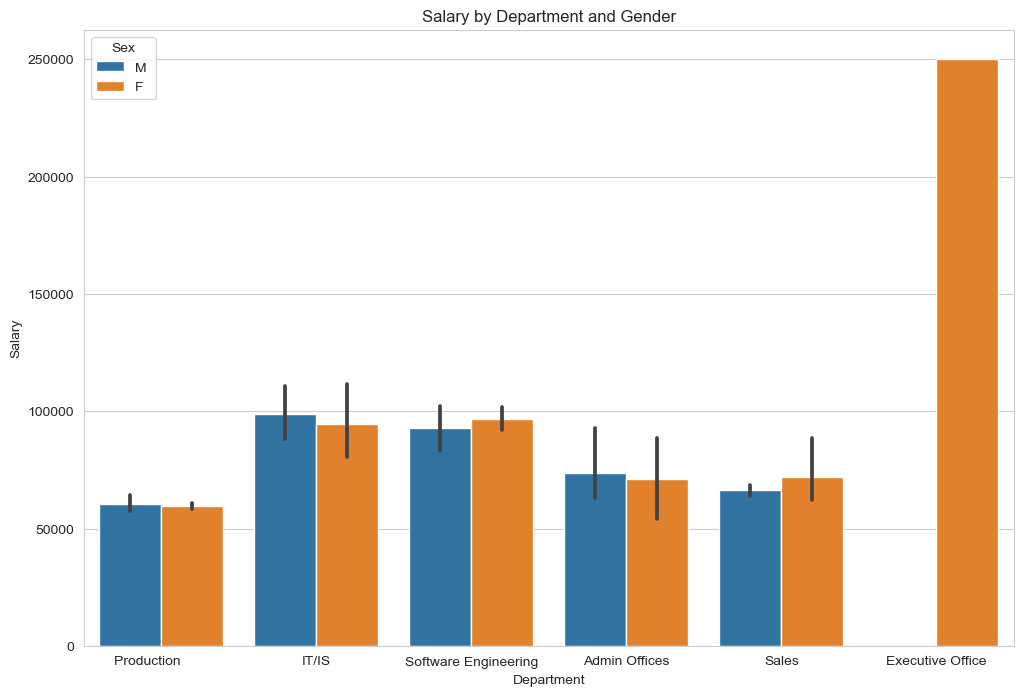

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='Salary', hue='Sex', data=hr_data)

plt.title('Salary by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.legend(title='Sex')
plt.show()

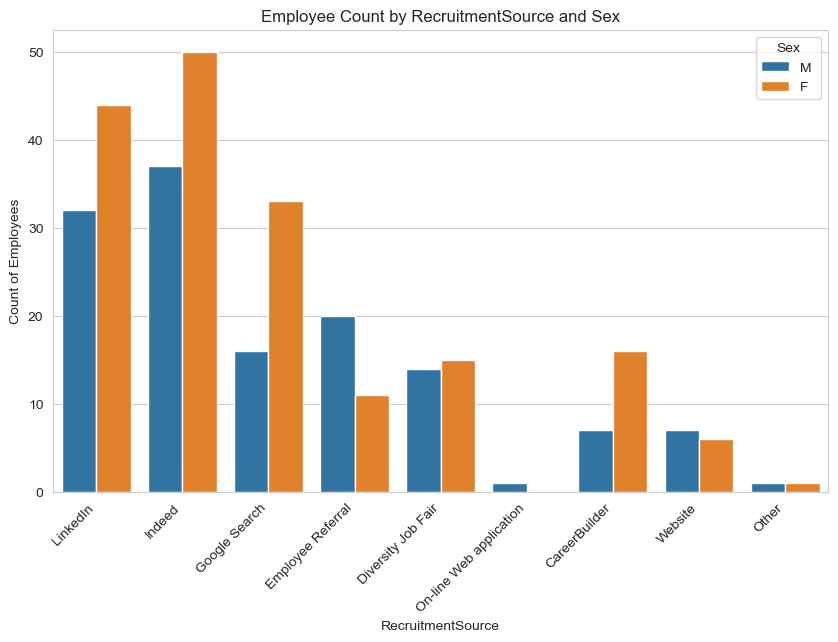

In [17]:
# Gender distribution in different RecruitmentSource
plt.figure(figsize=(10,6))
sns.countplot(x='RecruitmentSource', hue='Sex', data=hr_data)
# Customize x-axis labels
plt.xticks(rotation=45, ha='right') 
plt.title('Employee Count by RecruitmentSource and Sex')
plt.xlabel('RecruitmentSource')
plt.ylabel('Count of Employees')
plt.show()

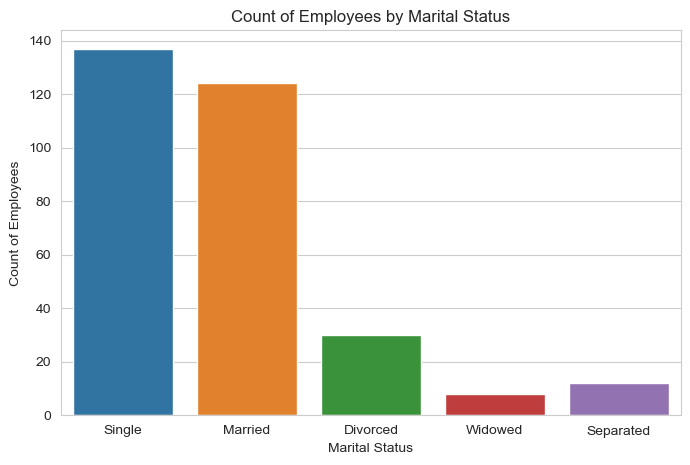

In [18]:
# Count of Employees by Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(x='MaritalDesc', data=hr_data)

plt.title('Count of Employees by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count of Employees')
plt.show()


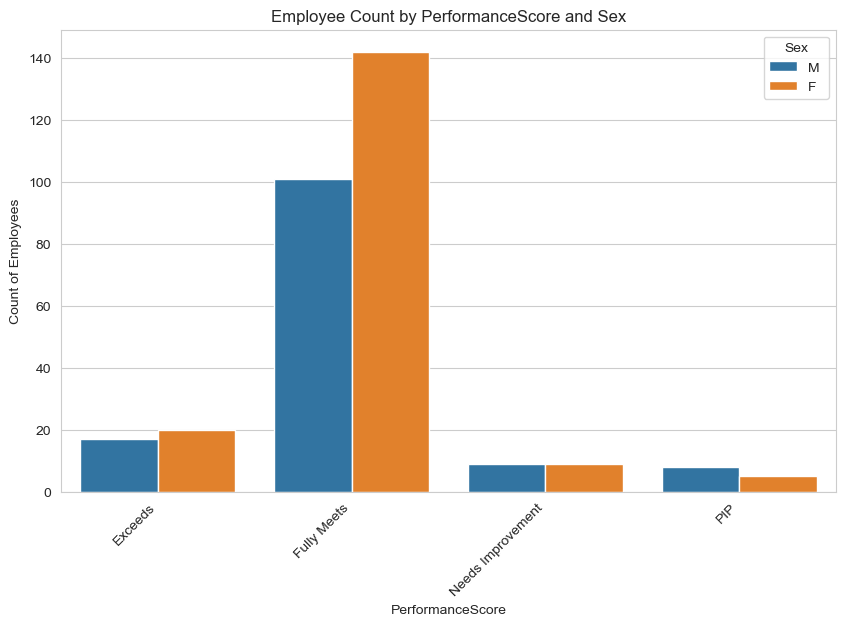

In [19]:
# Gender distribution in different Performance
plt.figure(figsize=(10,6))
sns.countplot(x='PerformanceScore', hue='Sex', data=hr_data)
# Customize x-axis labels
plt.xticks(rotation=45, ha='right') 
plt.title('Employee Count by PerformanceScore and Sex')
plt.xlabel('PerformanceScore')
plt.ylabel('Count of Employees')
plt.show()

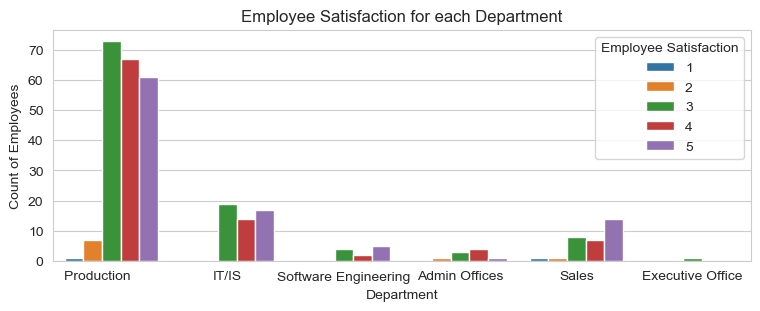

In [59]:
#Employee performance in different departments

plt.figure(figsize=(9,3))
sns.countplot(x='Department', hue='EmpSatisfaction', data=hr_data)
#plt.xticks(rotation=45, ha='right')
plt.title('Employee Satisfaction for each Department')
plt.xlabel('Department')
plt.ylabel('Count of Employees')
plt.legend(title='Employee Satisfaction')
plt.show()

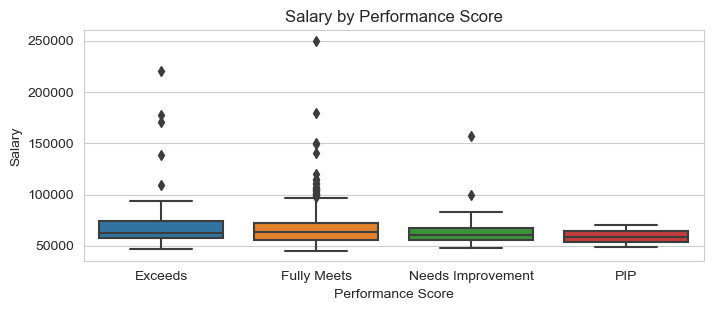

In [21]:
#Employee performance vs Salary and Sex

plt.figure(figsize=(8,3))
sns.boxplot(x='PerformanceScore', y='Salary', data=hr_data)

plt.title('Salary by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Salary')
plt.show()

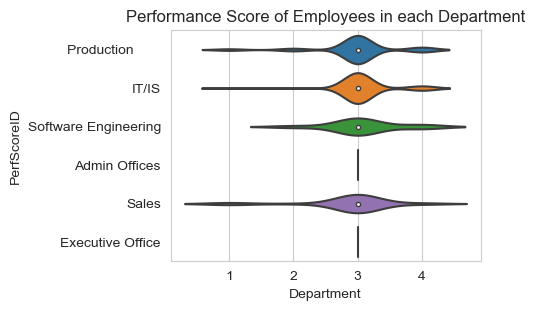

In [22]:
#Department vs Performnace

plt.figure(figsize=(4, 3))
sns.violinplot(x = 'PerfScoreID', y = 'Department', data = hr_data)
#plt.xticks(rotation=45, ha='right')
plt.title('Performance Score of Employees in each Department')
plt.xlabel('Department')
plt.ylabel('PerfScoreID')
plt.show()


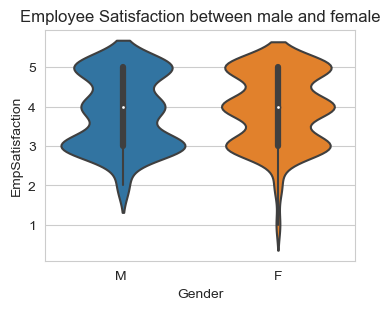

In [23]:
# Employee Satisfaction between male and female

plt.figure(figsize=(4, 3))
sns.violinplot(x = 'Sex', y = 'EmpSatisfaction', data = hr_data)

plt.title('Employee Satisfaction between male and female')
plt.xlabel('Gender')
plt.ylabel('EmpSatisfaction')
plt.show()


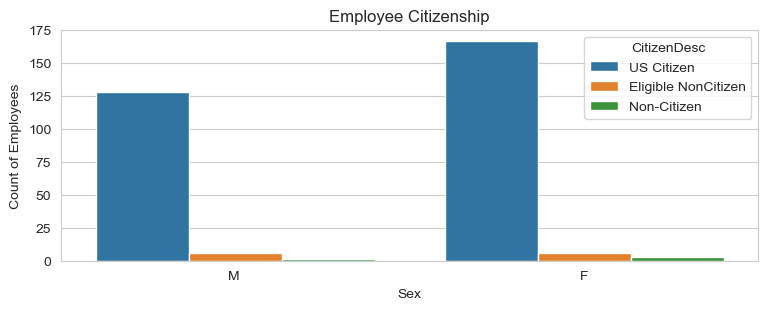

In [24]:
# Diversity(Citizenship)


# plt.figure(figsize=(9, 3))
# plt.hist(hr_data['CitizenDesc'], bins=10, edgecolor='black')

# plt.title('Employee Citizenship')
# plt.xlabel('Citizenship')
# plt.ylabel('Count of Employees')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

plt.figure(figsize=(9,3))
sns.countplot(x='Sex', hue='CitizenDesc', data=hr_data)
#plt.xticks(rotation=45, ha='right')
plt.title('Employee Citizenship')
plt.xlabel('Sex')
plt.ylabel('Count of Employees')
plt.legend(title='CitizenDesc')
plt.show()

<Figure size 1000x600 with 0 Axes>

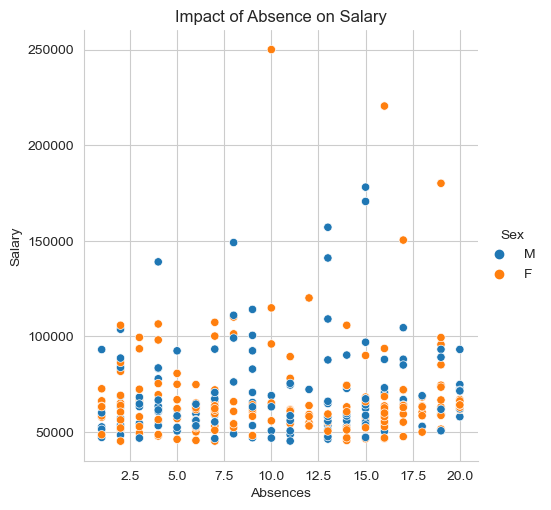

In [25]:
#Impact of Absence on Salary

plt.figure(figsize=(10, 6))
sns.relplot(x='Absences', y='Salary', hue = 'Sex', data=hr_data)

plt.title('Impact of Absence on Salary')
plt.xlabel('Absences')
plt.ylabel('Salary')
plt.show()

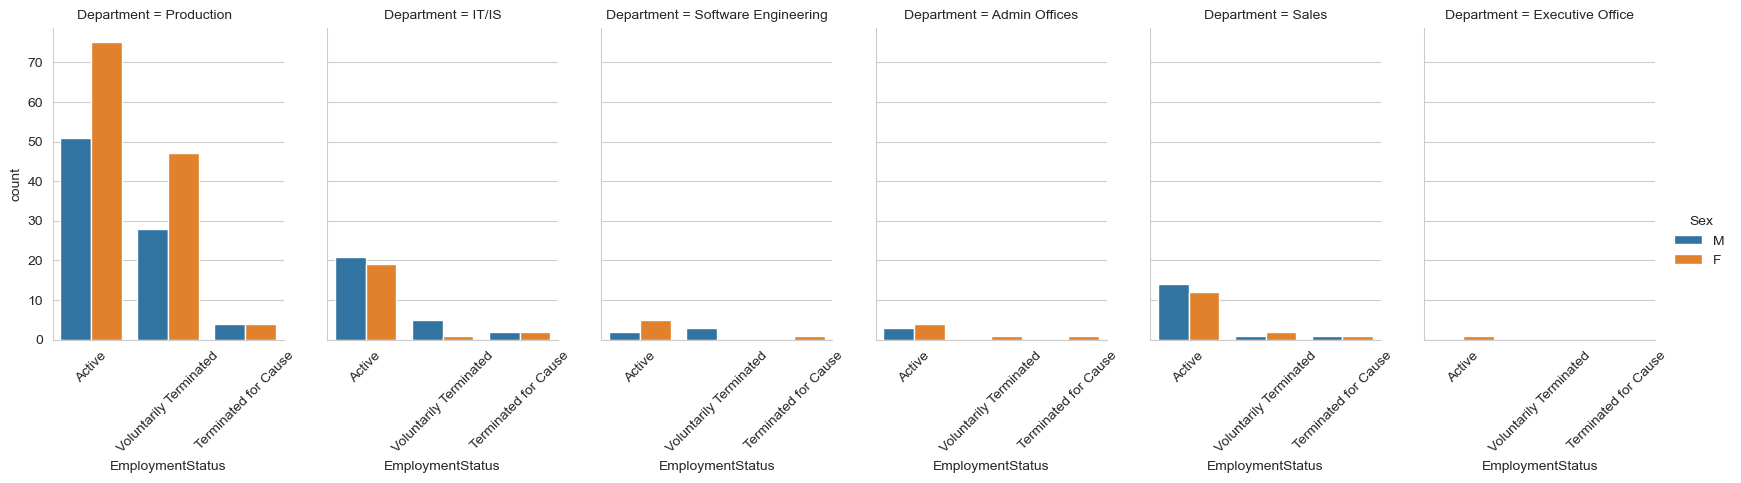

In [26]:
# Employee retension based on Sex and Department

g = sns.catplot(x='EmploymentStatus', hue='Sex', col='Department', data=hr_data, kind='count', height=4, aspect=0.7, dodge=True)

# Adjust the rotation of x-axis labels
g.set_xticklabels(rotation=45)

plt.show()

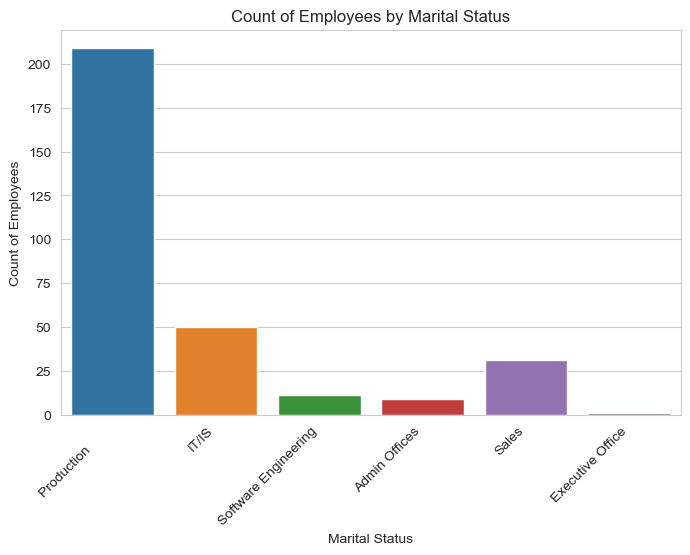

In [27]:
# department distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='Department', data=hr_data)
# Customize x-axis labels
plt.xticks(rotation=45, ha='right')
plt.title('Count of Employees by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count of Employees')
plt.show()

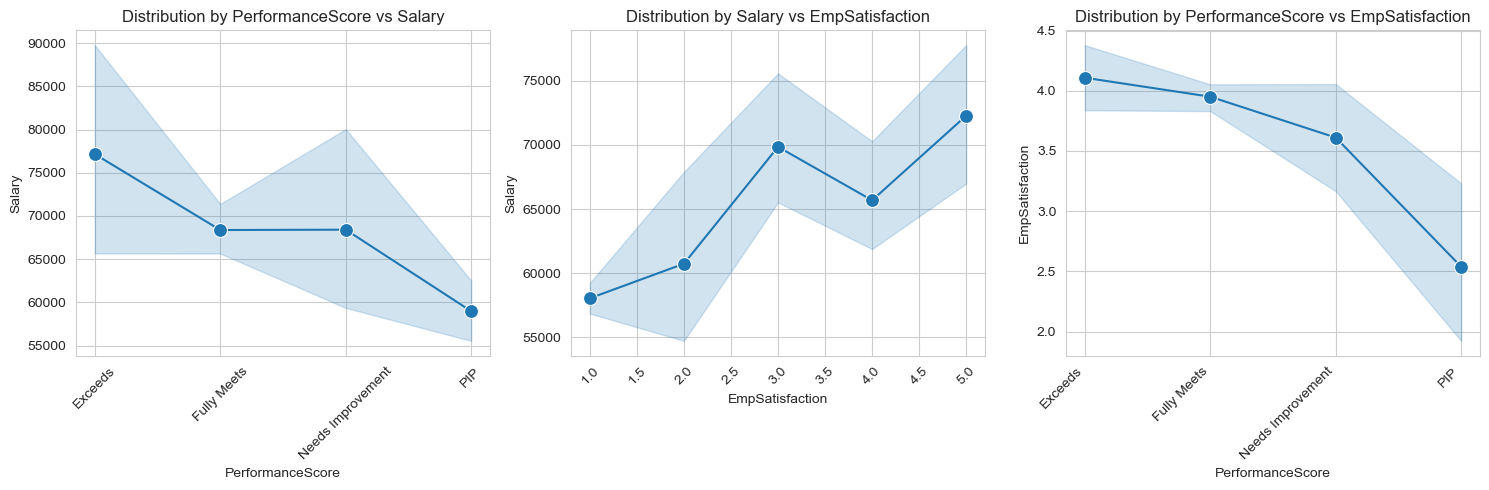

In [60]:
#Salary/PerformanceScore/EmpSatisfaction
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.xticks(rotation=45, ha='right')
# Bar plot for Sex
sns.lineplot(x='PerformanceScore', y='Salary', data=hr_data, marker='o', markersize=10, ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Distribution by PerformanceScore vs Salary')

# Bar plot for Department
sns.lineplot(x='EmpSatisfaction', y = 'Salary', data=hr_data, marker='o', markersize=10, ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Distribution by Salary vs EmpSatisfaction')

# Bar plot for Performance Status
sns.lineplot(x='PerformanceScore', y = 'EmpSatisfaction', data=hr_data, marker='o', markersize=10, ax=axes[2])
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_title('Distribution by PerformanceScore vs EmpSatisfaction')

# Adjust layout
plt.tight_layout()
plt.show()

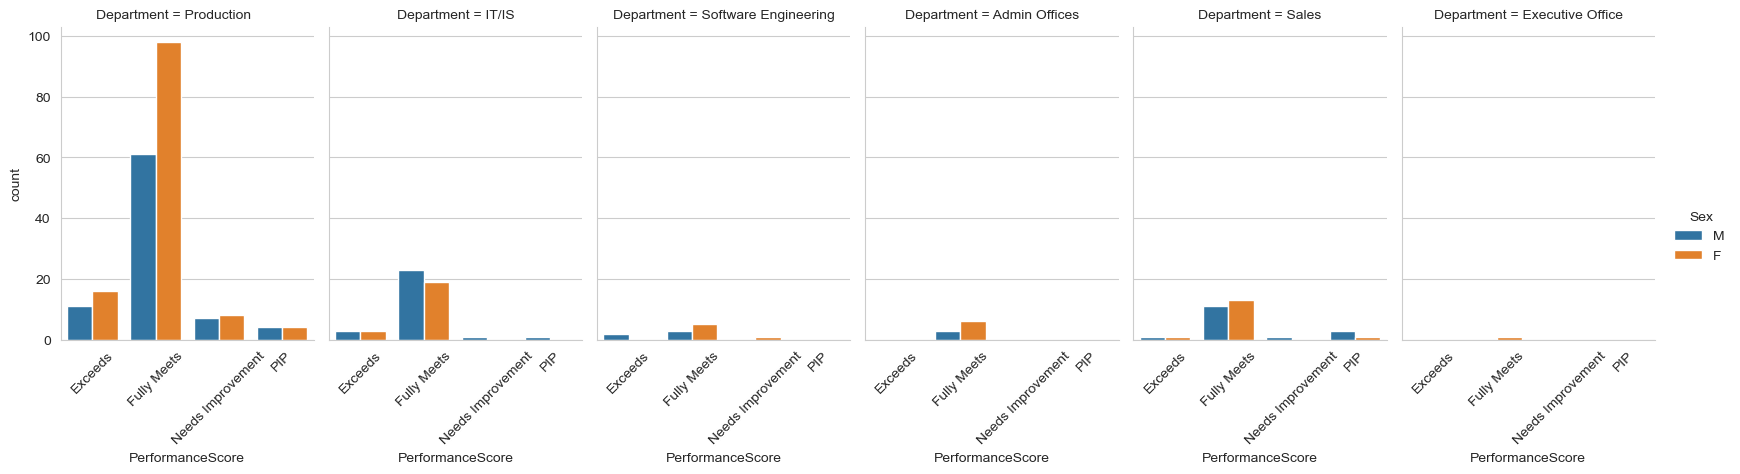

In [29]:
#Employee performance vs sex and departments

g = sns.catplot(x='PerformanceScore', hue='Sex', col='Department', data=hr_data, kind='count', height=4, aspect=0.7, dodge=True)

# Adjust the rotation of x-axis labels
g.set_xticklabels(rotation=45)

plt.show()

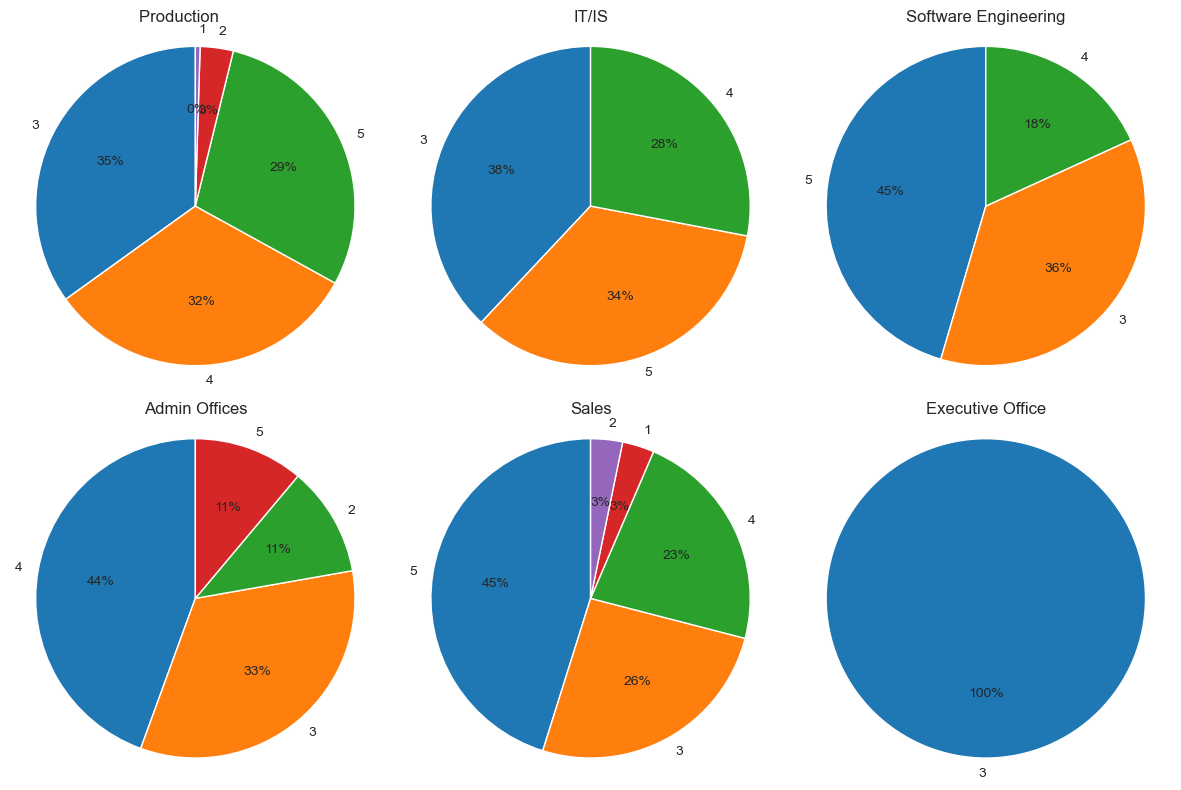

In [55]:
# Get unique departments
departments = hr_data['Department'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=len(departments)//2 + len(departments)%2, figsize=(12, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each department and create a pie chart
for i, department in enumerate(departments):
    # Filter data for the current department
    department_data = hr_data[hr_data['Department'] == department]
    
    # Count the occurrences of each satisfaction level
    satisfaction_counts = department_data['EmpSatisfaction'].value_counts()
    
    # Plot pie chart
    axes[i].pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.0f%%', startangle=90)
    axes[i].set_title(f'{department}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

ValueError: 'label' must be of length 'x'

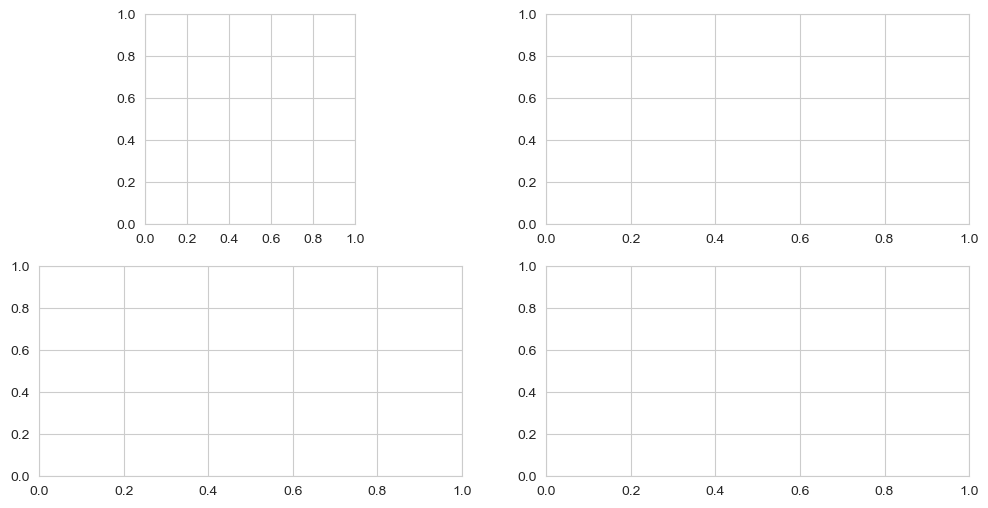

In [57]:

# Define colors for each level of EmpSatisfaction
colors = {1: 'red', 2: 'green', 3: 'blue'}  # Add more colors if needed

# Get unique departments
departments = df['Department'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=len(departments), figsize=(12, 6))

# Iterate over each department
for i, department in enumerate(departments):
    # Filter data for the current department
    department_data = hr_data[hr_data['Department'] == department]

    # Plot pie chart for the first row (EmpSatisfaction = 1)
    axes[0, i].pie(department_data[department_data['EmpSatisfaction'] == 1]['EmpSatisfaction'].value_counts(),
                   labels=[1], autopct='%1.1f%%', colors=[colors[1]])
    axes[0, i].set_title(f'Department {department} - EmpSatisfaction 1')

    # Plot pie chart for the second row (EmpSatisfaction = 2)
    axes[1, i].pie(department_data[department_data['EmpSatisfaction'] == 2]['EmpSatisfaction'].value_counts(),
                   labels=[2], autopct='%1.1f%%', colors=[colors[2]])
    axes[1, i].set_title(f'Department {department} - EmpSatisfaction 2')

# Adjust layout
plt.tight_layout()
plt.show()